# The Law of Large Numbers (LLN)

🧑🏻‍🏫 What is the LLN ? According to [Wikipedia](https://en.wikipedia.org/wiki/Law_of_large_numbers)

> This theorem is a fundamental result in probability theory. It describes **the results of performing the same experiment a large number of times**. 

> According to this law, **the average of the results obtained from a larger number of trials should be close to the expected value, the theoretical average value**, and it will tend to become closer to the expected value as more trials as performed

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## 🎲 Rolling a dice

🎲 Rolling a dice is a random experiment with 6 possible outcomes : 1, 2, 3, 4, 5, 6.

🤔 How can I roll a dice in a Jupyter Notebook ?

👉 [numpy.random.randint](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html) returns a random integer between `low` (inclusive) and `high` (exclusive)

In [ ]:
# Run this cell multiple times
np.random.randint(1,6+1)

2

* Everytime you run this cell, you are throwing a dice and the outcome if this experiment is totally random (1, 2, 3, 4, 5 or 6), we simply call it a **`random experiment`**.
* ❓How would you roll 3 dices simultaneously. Read the [numpy.random.randint](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html) docs and roll these three dice. ❓

In [ ]:
np.random.randint(1,6+1,3)

array([3, 1, 1])

🚀 So now, let's roll our dice `n = 20` times and compute the average outcome. Store the results in an `outcomes` variable and the average of these outcomes in an `average_outcome` variable.

In [ ]:
n = 20 # number of times you are rolling your dice

outcomes = np.random.randint(1,6+1,n)

average_outcome = np.mean(outcomes)

In [ ]:
outcomes

array([5, 4, 1, 6, 1, 3, 5, 2, 3, 1, 3, 3, 3, 6, 3, 3, 5, 5, 5, 6])

In [ ]:
average_outcome

3.65

🤔 What average value did you expect ? Store it in a `expected_value` variable.

In [ ]:
expected_value = 3.5

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('expected_value_dice',
    expected_value=expected_value
)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/markbotterill/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/markbotterill/code/lewagon_dev/data-solutions/03-Maths/02-Statistics-Probabilities/01-Law-of-Large-Numbers/tests
plugins: asyncio-0.19.0, anyio-3.7.1
asyncio: mode=strict
collecting ... collected 1 item

test_expected_value_dice.py::TestExpectedValueDice::test_expected_value_dice PASSED [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/expected_value_dice.pickle

git commit -m 'Completed expected_value_dice step'

git push origin master



<details>
    <summary>Explanations <i>(Take some time to think about the expected average value before untoggling this section!)</i></summary>

We can represent the different outcomes of the random experiment "rolling a dice" into a table with their respective probabilities.



| Possible outcomes | 1   | 2   | 3   | 4   | 5   | 6   | Total |
|-------------------|-----|-----|-----|-----|-----|-----|-------|
| Probabilities     | 1/6 | 1/6 | 1/6 | 1/6 | 1/6 | 1/6 | 100%  |
    
The `expected/theoretical average value` can be computed as follows:
    

$$ \mathbb{E}[X] = 1 \times \frac{1}{6} + 2 \times \frac{1}{6} + 3 \times \frac{1}{6} + 4 \times \frac{1}{6} + 5 \times \frac{1}{6} + 6 \times \frac{1}{6} = 3.5 $$
 
where `X` denotes the `random outcome` of `rolling a dice`.

👉 We say that `X` is a `random variable`

</details>

--- 

🔥 Let's verify the Law of Large Numbers for this 🎲 rolling a dice experiment.

***Questions :***

👉 Play with the number of trials and compute the associated average outcome.

🎨 Plot the average outcome vs. the number of trials.

In [ ]:
#############################################
#               expected value              #
#############################################

mu = 3.5

In [ ]:
#############################################
#     playing with the number of trials     #
#############################################

number_of_trials = 5000 # play with this number
trials = np.arange(1,number_of_trials + 1,1)
results = []

# Step-by-step version
for n in trials:
    # roll your dice n times
    tmp = np.random.randint(1,6+1, n)
    # compute the average outcome of these n dice
    average_outcome = np.mean(tmp)
    # store it in the list of results
    results.append(average_outcome)



In [ ]:
# One-liner version
results = []
for n in trials:
    results.append(np.mean(np.random.randint(1,6+1, n)))

In [ ]:
# One-liner version with list comprehensions
results = [np.mean(np.random.randint(1,6+1, n)) for n in trials]

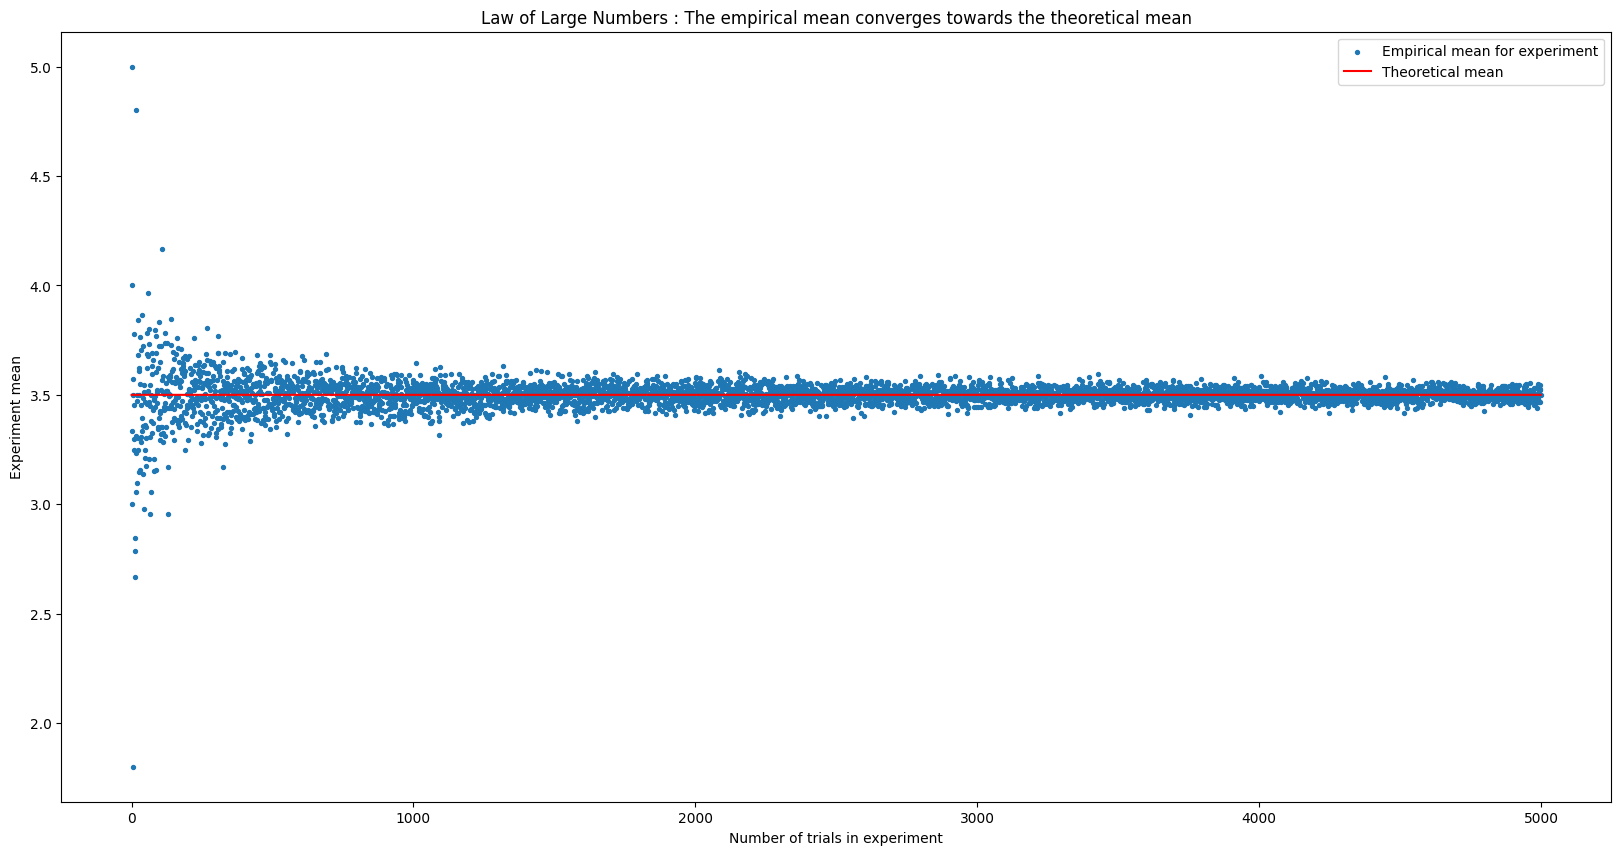

In [ ]:
#############################################
#            plotting the results           #
#############################################
    
    
plt.figure(figsize=(20,10))

plt.scatter(y=results, x = range(number_of_trials), label='Empirical mean for experiment', s=8)
plt.plot([mu]*len(results),label='Theoretical mean', color = "red")

plt.title('Law of Large Numbers : The empirical mean converges towards the theoretical mean')
plt.xlabel('Number of trials in experiment')
plt.ylabel('Experiment mean')

plt.legend(loc='best')
plt.show()

🎉 We can visually notice that the `empirical mean` $ \bar{X_n} = \frac{X_1 + X_2 + ... + X_{n-1} + X_n}{n}$ `converges towards the expected value` $ \mu = 3.5 $ as the *number of trials n increases* !

## 🪙 Tossing a coin 

### One time

👉 Let's run the same experiment with toss a coin instead.

* The outcomes are now 0 and 1.
* If you run the experiment 100 times, most likely you will have approximately 50 heads and 50 tails.
* Let's define "head" as a successful experiment and $p$ as the probability of having a head. Intuitively, $ p = \frac{1}{2} = 0.5 = 50 \%$

🤓 A random experiment with two possibles outcomes `success/failure`and $p$ as the `probability of success` is said to follow a **`Bernoulli distribution`** with parameter `p` $ \in [0,1] $

🔥 Let's verify the `Law of Large Numbers` for this `tossing a coin` experiment.

***Questions :***

👉 `Play with the number of trials in the cell below` and visualize the associated plot of average outcome vs. the number of trials.

In [ ]:
number_of_trials = 500 # play this this number
p = 0.5 # expected value of the coin

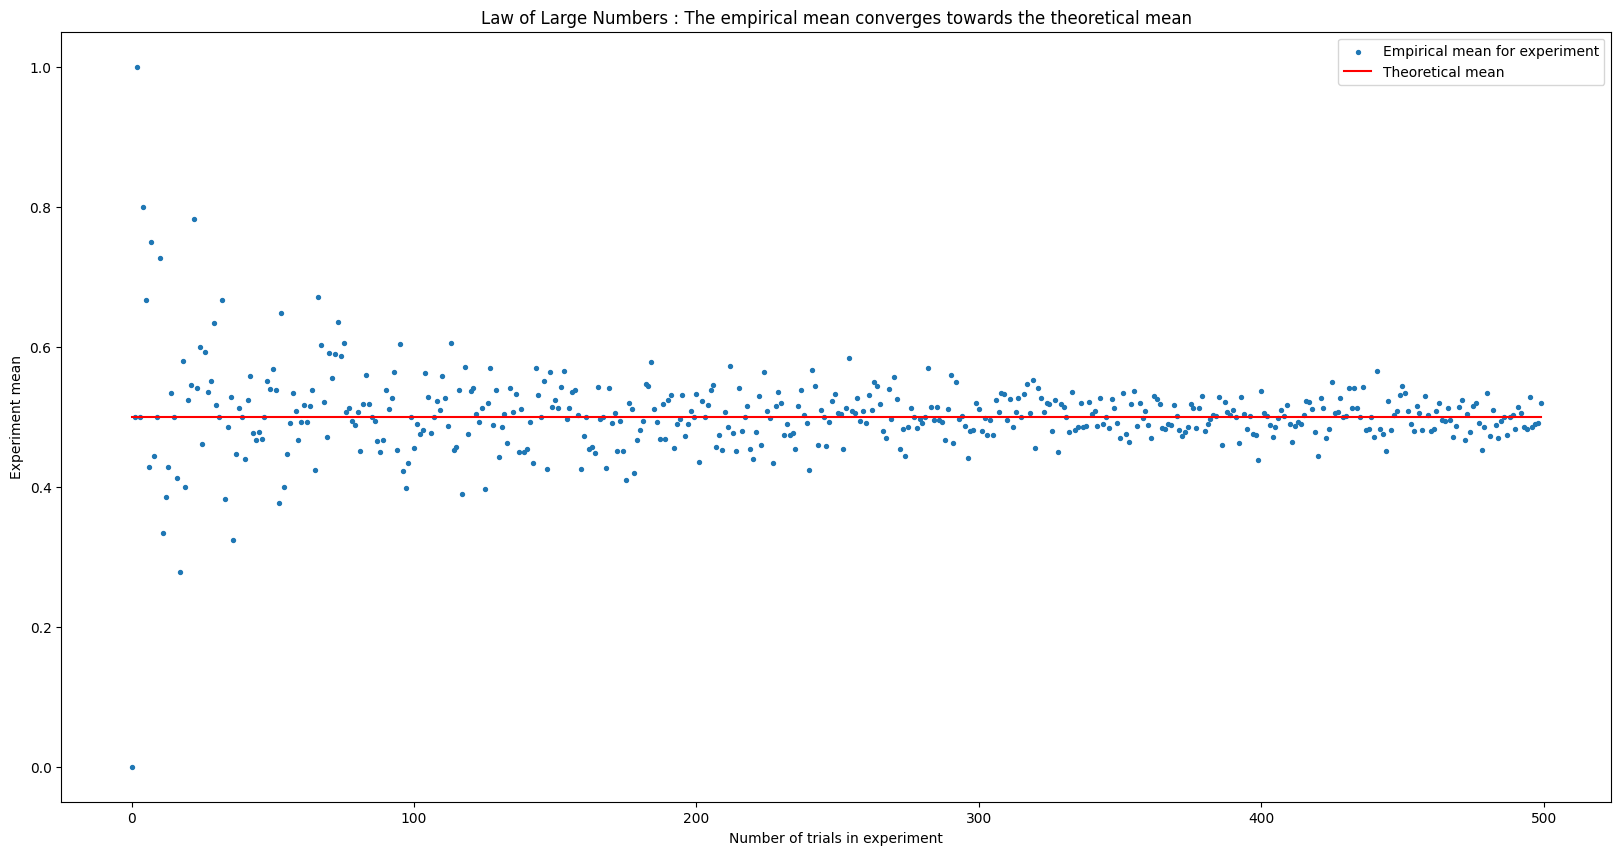

In [ ]:
#############################################
#     playing with the number of trials     #
#############################################
trials = np.arange(1,number_of_trials + 1,1)
results = [np.mean(np.random.randint(0,1+1, n)) for n in trials]
    
#############################################
#            plotting the results           #
#############################################
        
plt.figure(figsize=(20,10))

plt.scatter(y = results, x = range(number_of_trials), label='Empirical mean for experiment', s=8)
plt.plot([p]*len(results),label='Theoretical mean', color = "red")

plt.title('Law of Large Numbers : The empirical mean converges towards the theoretical mean')
plt.xlabel('Number of trials in experiment')
plt.ylabel('Experiment mean')

plt.legend(loc='best')
plt.show()

🎉 We can visually notice that the `empirical mean` $ \bar{X_n} = \frac{X_1 + X_2 + ... + X_{n-1} + X_n}{n}$ `converges towards the expected value` $ \mu = 0.5 $ as the *number of trials n increases* !

### Multiple times

👉 Here, ***ONE experiment*** consists of :
* tossing a coin `n_times`
* every trial has a `probability p` of success.

👉 After running one experiment, we can count the `number of successes` between `no success` and `n_times successes`.

📚 A random experiment with:
- two possible outcomes `success/failure`
- `p` $ \in [0,1] $ as the `probability of success`
- `n` $ \in \mathbb{N} $ trials

is said to follow a **`Binomial distribution (n,p)`** distribution.

😉 If you think about it, **`a Binomial distribution (n,p) is the sum of n independent Bernoulli(p) random variables`** !

---

❓ In the following cell, use [numpy.random.binomial](https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html) to simulate **ONE Binomial Experiment** in Python with:
- $p = 0.7$ (imagine that your coin is biased)
- $n = 10$ trials



In [ ]:
# Run this cell multiple times 
# for one realisation of a Binomial Experiment

n = 10  # tossing a coin n times
p = 0.7 # probability of success defined by p

# $CHALLENGIFY_BEGIN
print(f"Tossing a (unfair) coin {n} times with a probability {p} of getting a head...")
print("-"*5)

result = np.random.binomial(n = n, p = p, size = 1)
print(f"result = {result}")

print("-"*5)
print(f"Among these {n} coins, {result[0]} were HEADS (and {n - result[0]} turned out to be TAILS)")
# $CHALLENGIFY_END

Tossing a (unfair) coin 10 times with a probability 0.7 of getting a head...
-----
result = [7]
-----
Among these 10 coins, 7 were HEADS (and 3 turned out to be TAILS)


❓ Now, repeat this experiment $N = 20$ times and store the N results in a list

<details>
    <summary><i>Hint</i></summary>
    
Run the cell multiple times and observe the randomness...!
    
</details>

In [ ]:
# Run this cell multiple times 
# for N realisations of a Binomial Experience

N = 20  # number of experiment
n = 10  # tossing a coin n times
p = 0.7 # probability of success defined by p

# $CHALLENGIFY_BEGIN
my_realisations = np.random.binomial(n = n, p = p,size = N)

print(f"On average, among my {N} realisations, I had on average {np.mean(my_realisations)} successes out of {n} coins tossed")
# $CHALLENGIFY_END

On average, among my 20 realisations, I had on average 6.5 successes out of 10 coins tossed


🔥 Let's verify the `Law of Large Numbers` for this `tossing a coin multiple times` experiment

***Questions:***

🤔 What average value did you expect ? Store into a `expected_value_coins` variable.

In [ ]:
expected_value_coins = None

In [ ]:
expected_value_coins = 7

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('expected_value_coins',
    expected_value_coins=expected_value_coins
)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/markbotterill/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/markbotterill/code/lewagon_dev/data-solutions/03-Maths/02-Statistics-Probabilities/01-Law-of-Large-Numbers/tests
plugins: asyncio-0.19.0, anyio-3.7.1
asyncio: mode=strict
collecting ... collected 1 item

test_expected_value_coins.py::TestExpectedValueCoins::test_expected_value_coins PASSED [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/expected_value_coins.pickle

git commit -m 'Completed expected_value_coins step'

git push origin master



<details>
    <summary>Explanations</summary>

💡 For one Binomial Experience with $n = 10$ tosses and $p = 0.7$, you would expect $ n \times p = 10 \times 0.7 = 7$ successes.
    
📚 This result holds for any `Binomial(n,p)` random experiment!
    
$$ \mathbb{E}[X] = np $$
    
</details>

📈 Vizualize these results below

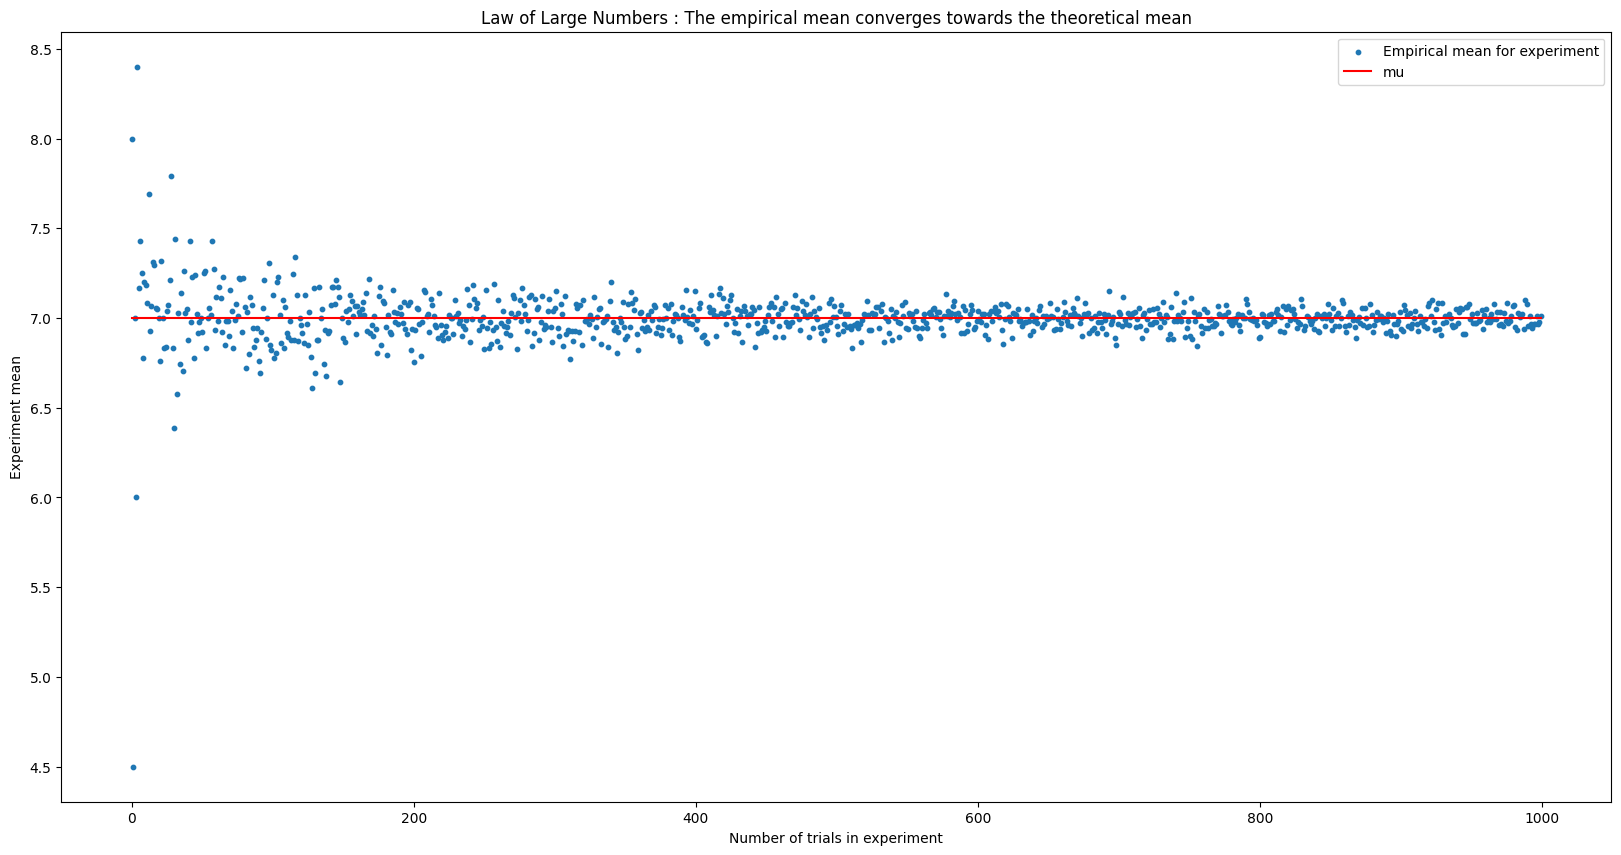

In [ ]:
#############################################
#     playing with the number of trials     #
#############################################
p = 0.7
n = 10
N = 1000

trials = np.arange(1,N + 1,1)
results = [np.mean(np.random.binomial(n = n,p = p, size = N)) for N in trials]
    
#############################################
#            plotting the results           #
#############################################
    
    
plt.figure(figsize=(20,10))

plt.scatter(y = results, x = range(N), label='Empirical mean for experiment', s = 10)
plt.plot([expected_value_coins]*len(results),label='mu', color = "red")

plt.title('Law of Large Numbers : The empirical mean converges towards the theoretical mean')
plt.xlabel('Number of trials in experiment')
plt.ylabel('Experiment mean')

plt.legend(loc='best')
plt.show()

🏁 Congratulations !!!

🔥 You've mastered one of the most fundamental theorems of `Probability Theory`, the `Law of Large Numbers`.

💾 Do not forget to `add/commit/push` your challenge !

---

***Additional ressources***

📺 [Law of Large Numbers - Explained and Visualized](https://www.youtube.com/watch?v=MntX3zWNWec) by Jeremy Blitz-Jones (4 min 11 sec)

🤓 Only for math nerds and completely overkill/unnecessary for data scientists:
- [ProbabilityCourse.com - LLN](https://www.probabilitycourse.com/chapter7/7_1_1_law_of_large_numbers.php)
- [Oxford University - LLN](http://www.stats.ox.ac.uk/~winkel/bs3a07l9-10.pdf)
